### IMDB 예제 

In [2]:
import os 
os.environ['HDF5_DISABLE_VERSION_CHECK']='2'

from keras.datasets import imdb
from keras.preprocessing import sequence


In [3]:
max_features = 10000 # 단어수 
maxlen = 500  # 사용할 텍스트의 길이 (시퀀스 길이)
batch_size = 32

In [5]:
(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words=max_features)  # 10000개 가져오기 

In [7]:
input_train.shape

(25000,)

In [9]:
len(input_train[0])

218

In [11]:
len(input_train[1]) , len(input_train[2])

(189, 141)

In [12]:
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)

In [14]:
input_train.shape

(25000, 500)

### 모델링

In [17]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1063 - acc: 0.9626 - val_loss: 0.4394 - val_acc: 0.8436
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0611 - acc: 0.9803 - val_loss: 0.6783 - val_acc: 0.7488
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.5963 - val_acc: 0.8024
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0239 - acc: 0.9937 - val_loss: 0.8600 - val_acc: 0.7276
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0139 - acc: 0.9965 - val_loss: 0.8347 - val_acc: 0.7710
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 0.8492 - val_acc: 0.7798
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.8599 - val_acc:

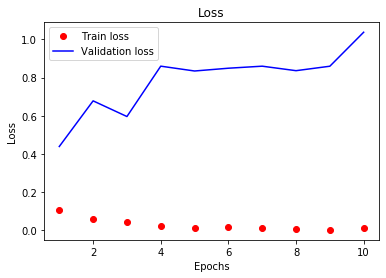

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']   # train data에 대한 정확도
val_acc = history.history['val_acc'] # 검증 데이터에 대한 정확도 

loss = history.history['loss']  # 학습 데이터에 대한 비용 
val_loss = history.history['val_loss']  # 검증 데이터에 대한 비용 

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', color='red', label= "Train loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

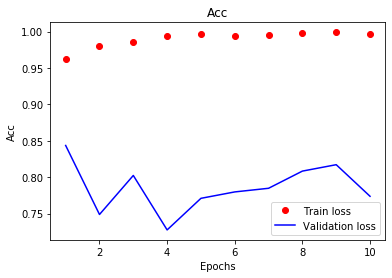

In [23]:
plt.plot(epochs, acc, 'bo', color='red', label= "Train loss")
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title("Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()



In [32]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\comsys\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.5109 - acc: 0.7573 - val_loss: 0.3986 - val_acc: 0.8472
Epoch 2/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.2928 - acc: 0.8857 - val_loss: 0.3134 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2341 - acc: 0.9120 - val_loss: 0.2877 - val_acc: 0.8864
Epoch 4/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1991 - acc: 0.9262 - val_loss: 0.3550 - val_acc: 0.8776
Epoch 5/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1735 - acc: 0.9373 - val_loss: 0.2959 - val_acc: 0.8878
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1564 - acc: 0.9433 - val_loss: 0.3379 - val_acc: 0.8848
Epoch 7/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.1404 - acc: 0.9517 - val_loss: 0.3165 - val_acc:

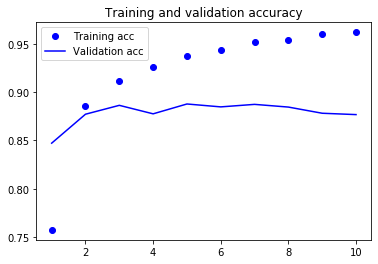

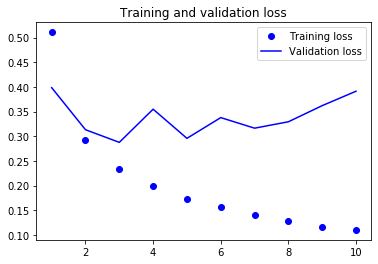

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

C:\Users\comsys\Anaconda3\envs\tf2.0-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 58s 3ms/step - loss: 0.5211 - acc: 0.7596 - val_loss: 0.6660 - val_acc: 0.6808
Epoch 2/4
20000/20000 [==============================] - 60s 3ms/step - loss: 0.3031 - acc: 0.8802 - val_loss: 0.3299 - val_acc: 0.8656
Epoch 3/4
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2387 - acc: 0.9111 - val_loss: 0.3402 - val_acc: 0.8494
Epoch 4/4
20000/20000 [==============================] - 61s 3ms/step - loss: 0.2034 - acc: 0.9250 - val_loss: 0.3252 - val_acc: 0.8604


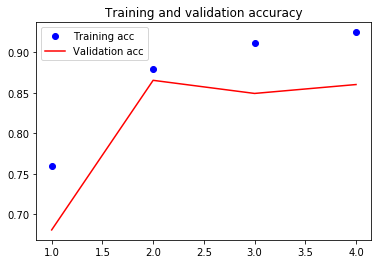

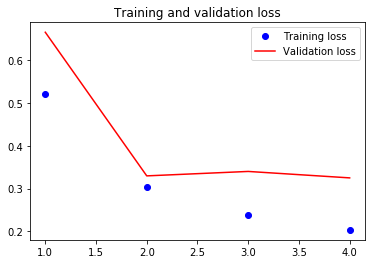

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()